In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [0]:
train = pd.read_csv('loan_status_train.csv',delimiter=',')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.shape

(614, 13)

In [5]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [11]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [12]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [13]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
train['ApplicantIncome'].value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [15]:
train['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [16]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [19]:
train['Credit_History'].mode()[0]

1.0

In [20]:
train['LoanAmount'].mode()[0]

120.0

In [21]:
train['ApplicantIncome'].mode()[0]

2500

In [22]:
train['Self_Employed'].mode()[0]

'No'

In [24]:
train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [0]:
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [26]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [0]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())

In [0]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())

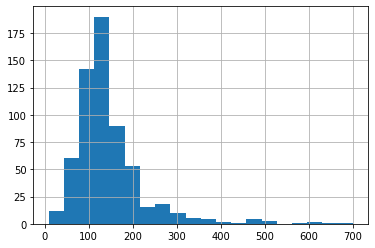

In [32]:
train['LoanAmount'].hist(bins=20)

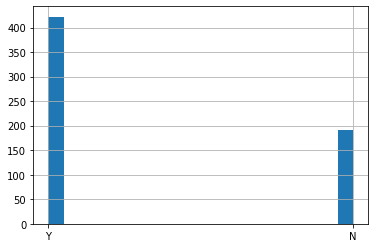

In [33]:
train['Loan_Status'].hist(bins=20)

In [0]:
le = LabelEncoder()

In [45]:
train['LoanAmount'] = le.fit_transform(train['LoanAmount'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
train['ApplicantIncome'] = le.fit_transform(train['ApplicantIncome'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_bins
0,LP001002,Male,No,0,Graduate,No,372,0.0,100,360.0,1.0,Urban,1,NaN
1,LP001003,Male,Yes,1,Graduate,No,304,1508.0,81,360.0,1.0,Rural,0,NaN
2,LP001005,Male,Yes,0,Graduate,Yes,137,0.0,26,360.0,1.0,Urban,1,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,89,2358.0,73,360.0,1.0,Urban,1,NaN
4,LP001008,Male,No,0,Graduate,No,375,0.0,94,360.0,1.0,Urban,1,NaN


In [0]:
function_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
X = train[function_cols]
y = train.Loan_Status

In [54]:
test = pd.read_csv('loan_test.csv',delimiter=',')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [55]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [56]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [0]:
test['LoanAmount'] = test['LoanAmount'].fillna(0)

In [0]:
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mean())

In [0]:
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.3,random_state=42)

In [0]:
lin = LinearRegression()

In [62]:
lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
print(lin.coef_)
lin.intercept_

[ 1.45070212e-04 -2.03570436e-06 -7.50273295e-04]


0.7281022095950858

In [64]:
predict = lin.predict(x_test)
print(sqrt(mean_squared_error(y_test,predict)))

0.4682619904276011


In [0]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.001,normalize=True)

In [66]:
ridgereg.fit(x_train,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [73]:
print(sqrt(mean_squared_error(y_train,ridgereg.predict(x_train))))
print(sqrt(mean_squared_error(y_test,ridgereg.predict(x_test))))


0.45811427662849485
0.4682589404103183


In [0]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001,normalize=True)

In [70]:
lassoreg.fit(x_train,y_train)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [72]:
print(sqrt(mean_squared_error(y_train,lassoreg.predict(x_train))))
print(sqrt(mean_squared_error(y_test,lassoreg.predict(x_test))))


0.4589734701981019
0.46673172202545643


In [0]:
from sklearn.linear_model import ElasticNet
elasticreg = ElasticNet(alpha = 0.001,normalize=True)

In [75]:
elasticreg.fit(x_train,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
print(sqrt(mean_squared_error(y_train,elasticreg.predict(x_train))))
print(sqrt(mean_squared_error(y_test,elasticreg.predict(x_test))))

0.4586078103217597
0.4669220325497315
